In [1]:
from pyspark.sql import SparkSession
from datetime import datetime
import json
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [3]:
df = spark.read.json('sample_10e3.json')
df.show(5)

+--------------------+--------+-----------+--------------+-------------+----------------+-----------+--------------------+--------------------+---------+--------+
|                 _id|ageRange|idplug_base|idplug_station|idunplug_base|idunplug_station|travel_time|     unplug_hourTime|       user_day_code|user_type|zip_code|
+--------------------+--------+-----------+--------------+-------------+----------------+-----------+--------------------+--------------------+---------+--------+
|[5cf83b752f3843a0...|       0|         21|            66|            8|              90|        219|[2019-06-01T00:00...|e4d55deb9ac172a8d...|        1|        |
|[5cf83b762f3843a0...|       4|         19|           136|           19|              71|        359|[2019-06-01T00:00...|8a0c4123e924a50a9...|        1|   28039|
|[5cf83b762f3843a0...|       4|         17|            38|            7|              39|        375|[2019-06-01T00:00...|a6a9c1f74a6849600...|        1|   28013|
|[5cf83b762f3843a0...|

In [4]:
def get_data(line):
    data = json.loads(line)
    data["_id"] = data["_id"]["$oid"]
    data['unplug_hourTime'] = datetime.strptime(data['unplug_hourTime']['$date'], "%Y-%m-%dT%H:%M:%S.%f%z")
    return data

In [5]:
rdd = sc.textFile('sample_10e2.json').map(get_data)
df = spark.createDataFrame(rdd)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/session.py:401: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [6]:
df.printSchema()

root
 |-- _id: string (nullable = true)
 |-- ageRange: long (nullable = true)
 |-- idplug_base: long (nullable = true)
 |-- idplug_station: long (nullable = true)
 |-- idunplug_base: long (nullable = true)
 |-- idunplug_station: long (nullable = true)
 |-- travel_time: long (nullable = true)
 |-- unplug_hourTime: timestamp (nullable = true)
 |-- user_day_code: string (nullable = true)
 |-- user_type: long (nullable = true)
 |-- zip_code: string (nullable = true)



In [7]:
rdd = sc.textFile('sample_10e3.json').map(get_data)
df1 = spark.createDataFrame(rdd)
rdd = sc.textFile('sample_10e4.json').map(get_data)
df2 = spark.createDataFrame(rdd)
df1.printSchema()
df2.printSchema()

root
 |-- _id: string (nullable = true)
 |-- ageRange: long (nullable = true)
 |-- idplug_base: long (nullable = true)
 |-- idplug_station: long (nullable = true)
 |-- idunplug_base: long (nullable = true)
 |-- idunplug_station: long (nullable = true)
 |-- travel_time: long (nullable = true)
 |-- unplug_hourTime: timestamp (nullable = true)
 |-- user_day_code: string (nullable = true)
 |-- user_type: long (nullable = true)
 |-- zip_code: string (nullable = true)

root
 |-- _id: string (nullable = true)
 |-- ageRange: long (nullable = true)
 |-- idplug_base: long (nullable = true)
 |-- idplug_station: long (nullable = true)
 |-- idunplug_base: long (nullable = true)
 |-- idunplug_station: long (nullable = true)
 |-- travel_time: long (nullable = true)
 |-- unplug_hourTime: timestamp (nullable = true)
 |-- user_day_code: string (nullable = true)
 |-- user_type: long (nullable = true)
 |-- zip_code: string (nullable = true)



In [8]:
df1.show(5)
df2.show(5)

+--------------------+--------+-----------+--------------+-------------+----------------+-----------+-------------------+--------------------+---------+--------+
|                 _id|ageRange|idplug_base|idplug_station|idunplug_base|idunplug_station|travel_time|    unplug_hourTime|       user_day_code|user_type|zip_code|
+--------------------+--------+-----------+--------------+-------------+----------------+-----------+-------------------+--------------------+---------+--------+
|5cf83b752f3843a01...|       0|         21|            66|            8|              90|        219|2019-06-01 00:00:00|e4d55deb9ac172a8d...|        1|        |
|5cf83b762f3843a01...|       4|         19|           136|           19|              71|        359|2019-06-01 00:00:00|8a0c4123e924a50a9...|        1|   28039|
|5cf83b762f3843a01...|       4|         17|            38|            7|              39|        375|2019-06-01 00:00:00|a6a9c1f74a6849600...|        1|   28013|
|5cf83b762f3843a01...|      

In [9]:
print(df.count())
print(df1.count())
print(df2.count())

100
1000
10000


In [10]:
df1 = df1.unionAll(df2)
df = df.unionAll(df1)
df.count()

11100

In [11]:
df.printSchema()

root
 |-- _id: string (nullable = true)
 |-- ageRange: long (nullable = true)
 |-- idplug_base: long (nullable = true)
 |-- idplug_station: long (nullable = true)
 |-- idunplug_base: long (nullable = true)
 |-- idunplug_station: long (nullable = true)
 |-- travel_time: long (nullable = true)
 |-- unplug_hourTime: timestamp (nullable = true)
 |-- user_day_code: string (nullable = true)
 |-- user_type: long (nullable = true)
 |-- zip_code: string (nullable = true)



In [12]:
df.show(5)

+--------------------+--------+-----------+--------------+-------------+----------------+-----------+-------------------+--------------------+---------+--------+
|                 _id|ageRange|idplug_base|idplug_station|idunplug_base|idunplug_station|travel_time|    unplug_hourTime|       user_day_code|user_type|zip_code|
+--------------------+--------+-----------+--------------+-------------+----------------+-----------+-------------------+--------------------+---------+--------+
|5cf83b752f3843a01...|       0|         21|            66|            8|              90|        219|2019-06-01 00:00:00|e4d55deb9ac172a8d...|        1|        |
|5cf83b762f3843a01...|       4|         19|           136|           19|              71|        359|2019-06-01 00:00:00|8a0c4123e924a50a9...|        1|   28039|
|5cf83b762f3843a01...|       4|         17|            38|            7|              39|        375|2019-06-01 00:00:00|a6a9c1f74a6849600...|        1|   28013|
|5cf83b762f3843a01...|      

In [13]:
df = df.drop('_id')
df.show(5)

+--------+-----------+--------------+-------------+----------------+-----------+-------------------+--------------------+---------+--------+
|ageRange|idplug_base|idplug_station|idunplug_base|idunplug_station|travel_time|    unplug_hourTime|       user_day_code|user_type|zip_code|
+--------+-----------+--------------+-------------+----------------+-----------+-------------------+--------------------+---------+--------+
|       0|         21|            66|            8|              90|        219|2019-06-01 00:00:00|e4d55deb9ac172a8d...|        1|        |
|       4|         19|           136|           19|              71|        359|2019-06-01 00:00:00|8a0c4123e924a50a9...|        1|   28039|
|       4|         17|            38|            7|              39|        375|2019-06-01 00:00:00|a6a9c1f74a6849600...|        1|   28013|
|       5|          4|            90|           21|              66|        264|2019-06-01 00:00:00|5706c0bd494acc022...|        1|   28009|
|       4|   

In [14]:
df = df.drop('user_day_code')
df.show(5)

+--------+-----------+--------------+-------------+----------------+-----------+-------------------+---------+--------+
|ageRange|idplug_base|idplug_station|idunplug_base|idunplug_station|travel_time|    unplug_hourTime|user_type|zip_code|
+--------+-----------+--------------+-------------+----------------+-----------+-------------------+---------+--------+
|       0|         21|            66|            8|              90|        219|2019-06-01 00:00:00|        1|        |
|       4|         19|           136|           19|              71|        359|2019-06-01 00:00:00|        1|   28039|
|       4|         17|            38|            7|              39|        375|2019-06-01 00:00:00|        1|   28013|
|       5|          4|            90|           21|              66|        264|2019-06-01 00:00:00|        1|   28009|
|       4|          3|           166|           13|             152|        367|2019-06-01 00:00:00|        1|   28006|
+--------+-----------+--------------+---

In [15]:
df.select('ageRange').show(5)

+--------+
|ageRange|
+--------+
|       0|
|       4|
|       4|
|       5|
|       4|
+--------+
only showing top 5 rows



In [16]:
df.groupBy('user_type').count().show()

+---------+-----+
|user_type|count|
+---------+-----+
|        0|  201|
|        1| 9809|
|        3|  961|
|        2|  129|
+---------+-----+



In [17]:
df.select('unplug_hourTime').show(10)

+-------------------+
|    unplug_hourTime|
+-------------------+
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
|2019-06-01 00:00:00|
+-------------------+
only showing top 10 rows



In [18]:
df.groupBy('unplug_hourTime').count().show()

+-------------------+-----+
|    unplug_hourTime|count|
+-------------------+-----+
|2018-04-17 11:00:00|    1|
|2017-05-09 16:00:00|    2|
|2017-07-14 23:00:00|    1|
|2018-01-26 14:00:00|    1|
|2017-05-06 17:00:00|    3|
|2018-05-20 13:00:00|    1|
|2018-03-21 14:00:00|    3|
|2017-10-28 16:00:00|    2|
|2018-06-15 12:00:00|    1|
|2017-07-21 07:00:00|    3|
|2017-06-15 08:00:00|    2|
|2017-11-09 15:00:00|    2|
|2017-07-21 12:00:00|    2|
|2017-12-22 07:00:00|    2|
|2018-04-12 17:00:00|    1|
|2017-08-22 17:00:00|    1|
|2017-08-10 13:00:00|    2|
|2017-06-21 00:00:00|    1|
|2017-06-13 12:00:00|    1|
|2018-01-15 22:00:00|    1|
+-------------------+-----+
only showing top 20 rows



In [19]:
df.groupBy('zip_code').count().show(5)

+--------+-----+
|zip_code|count|
+--------+-----+
|   13610|    1|
|   28039|   89|
|   28500|    2|
|   13170|    2|
|   28707|    1|
+--------+-----+
only showing top 5 rows



In [20]:
df.select('zip_code').distinct().count()

261

In [21]:
df = df.drop('zip_code')
df.show(5)

+--------+-----------+--------------+-------------+----------------+-----------+-------------------+---------+
|ageRange|idplug_base|idplug_station|idunplug_base|idunplug_station|travel_time|    unplug_hourTime|user_type|
+--------+-----------+--------------+-------------+----------------+-----------+-------------------+---------+
|       0|         21|            66|            8|              90|        219|2019-06-01 00:00:00|        1|
|       4|         19|           136|           19|              71|        359|2019-06-01 00:00:00|        1|
|       4|         17|            38|            7|              39|        375|2019-06-01 00:00:00|        1|
|       5|          4|            90|           21|              66|        264|2019-06-01 00:00:00|        1|
|       4|          3|           166|           13|             152|        367|2019-06-01 00:00:00|        1|
+--------+-----------+--------------+-------------+----------------+-----------+-------------------+---------+
o

In [22]:
df = df.drop('idplug_base','idunplug_base')
df.show(5)

+--------+--------------+----------------+-----------+-------------------+---------+
|ageRange|idplug_station|idunplug_station|travel_time|    unplug_hourTime|user_type|
+--------+--------------+----------------+-----------+-------------------+---------+
|       0|            66|              90|        219|2019-06-01 00:00:00|        1|
|       4|           136|              71|        359|2019-06-01 00:00:00|        1|
|       4|            38|              39|        375|2019-06-01 00:00:00|        1|
|       5|            90|              66|        264|2019-06-01 00:00:00|        1|
|       4|           166|             152|        367|2019-06-01 00:00:00|        1|
+--------+--------------+----------------+-----------+-------------------+---------+
only showing top 5 rows



In [23]:
df.columns

['ageRange',
 'idplug_station',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_type']

In [24]:
date = '2021-05-21 11:22:03'
date = datetime.strptime(date,"%Y-%m-%d %H:%M:%S")
date.year

2021

In [25]:
df.head(91)[-1][4].year

2019

In [26]:
df = df.withColumn('year',year(df['unplug_hourTime']))
df = df.withColumn('month',month(df['unplug_hourTime']))
df = df.withColumn('day',dayofmonth(df['unplug_hourTime']))
df = df.withColumn('hour',hour(df['unplug_hourTime']))
df.show(5)

+--------+--------------+----------------+-----------+-------------------+---------+----+-----+---+----+
|ageRange|idplug_station|idunplug_station|travel_time|    unplug_hourTime|user_type|year|month|day|hour|
+--------+--------------+----------------+-----------+-------------------+---------+----+-----+---+----+
|       0|            66|              90|        219|2019-06-01 00:00:00|        1|2019|    6|  1|   0|
|       4|           136|              71|        359|2019-06-01 00:00:00|        1|2019|    6|  1|   0|
|       4|            38|              39|        375|2019-06-01 00:00:00|        1|2019|    6|  1|   0|
|       5|            90|              66|        264|2019-06-01 00:00:00|        1|2019|    6|  1|   0|
|       4|           166|             152|        367|2019-06-01 00:00:00|        1|2019|    6|  1|   0|
+--------+--------------+----------------+-----------+-------------------+---------+----+-----+---+----+
only showing top 5 rows



In [27]:
df.select('idplug_station').distinct().count()

175

In [28]:
df.select('idunplug_station').distinct().count()

175

In [29]:
df = df.select('ageRange','year','month','day','hour','travel_time')
df.show(5)

+--------+----+-----+---+----+-----------+
|ageRange|year|month|day|hour|travel_time|
+--------+----+-----+---+----+-----------+
|       0|2019|    6|  1|   0|        219|
|       4|2019|    6|  1|   0|        359|
|       4|2019|    6|  1|   0|        375|
|       5|2019|    6|  1|   0|        264|
|       4|2019|    6|  1|   0|        367|
+--------+----+-----+---+----+-----------+
only showing top 5 rows



In [30]:
df.select('ageRange').distinct().count()

7

In [31]:
df = df.withColumn('agrng_0',when(df['ageRange'] == 0, 1).otherwise(0))
df = df.withColumn('agrng_1',when(df['ageRange'] == 1, 1).otherwise(0))
df = df.withColumn('agrng_2',when(df['ageRange'] == 2, 1).otherwise(0))
df = df.withColumn('agrng_3',when(df['ageRange'] == 3, 1).otherwise(0))
df = df.withColumn('agrng_4',when(df['ageRange'] == 4, 1).otherwise(0))
df = df.withColumn('agrng_5',when(df['ageRange'] == 5, 1).otherwise(0))
df = df.withColumn('agrng_6',when(df['ageRange'] == 6, 1).otherwise(0))
df = df.drop('ageRange')
df.show(5)

+----+-----+---+----+-----------+-------+-------+-------+-------+-------+-------+-------+
|year|month|day|hour|travel_time|agrng_0|agrng_1|agrng_2|agrng_3|agrng_4|agrng_5|agrng_6|
+----+-----+---+----+-----------+-------+-------+-------+-------+-------+-------+-------+
|2019|    6|  1|   0|        219|      1|      0|      0|      0|      0|      0|      0|
|2019|    6|  1|   0|        359|      0|      0|      0|      0|      1|      0|      0|
|2019|    6|  1|   0|        375|      0|      0|      0|      0|      1|      0|      0|
|2019|    6|  1|   0|        264|      0|      0|      0|      0|      0|      1|      0|
|2019|    6|  1|   0|        367|      0|      0|      0|      0|      1|      0|      0|
+----+-----+---+----+-----------+-------+-------+-------+-------+-------+-------+-------+
only showing top 5 rows



In [32]:
for i in df.columns:
    print("corr entre ",i," y travel_time: ",df.stat.corr('travel_time',i))

corr entre  year  y travel_time:  -0.017008307485839865
corr entre  month  y travel_time:  -0.0018332803616744034
corr entre  day  y travel_time:  -0.0031154427990553665
corr entre  hour  y travel_time:  0.013875416798685149
corr entre  travel_time  y travel_time:  1.0
corr entre  agrng_0  y travel_time:  0.024417612656568017
corr entre  agrng_1  y travel_time:  0.01925697411883967
corr entre  agrng_2  y travel_time:  0.0003806258007188328
corr entre  agrng_3  y travel_time:  -0.006403669963036548
corr entre  agrng_4  y travel_time:  -0.02439301321300211
corr entre  agrng_5  y travel_time:  0.0004747325884247928
corr entre  agrng_6  y travel_time:  -0.003042317503762217


In [54]:
m = df.select('month').rdd.flatMap(lambda x : x).collect()
t = df.select('travel_time').rdd.flatMap(lambda x : x).collect()

In [57]:
print(m[:10])
print(t[:10])

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[219, 359, 375, 264, 367, 174, 308, 462, 482, 480]


(0.0, 25000.0)

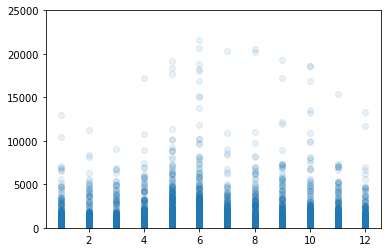

In [62]:
plt.scatter(m,t,alpha = 0.1)
plt.ylim(0,25000)

(0.0, 25000.0)

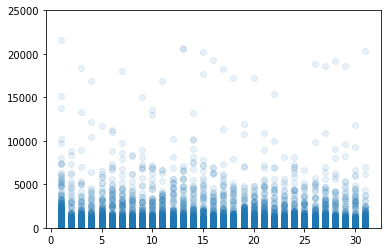

In [63]:
d = df.select('day').rdd.flatMap(lambda x : x).collect()
plt.scatter(d,t,alpha = 0.1)
plt.ylim(0,25000)

(0.0, 25000.0)

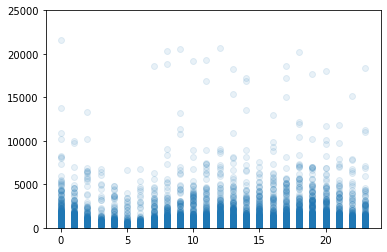

In [64]:
h = df.select('hour').rdd.flatMap(lambda x : x).collect()
plt.scatter(h,t,alpha = 0.1)
plt.ylim(0,25000)

(0.0, 25000.0)

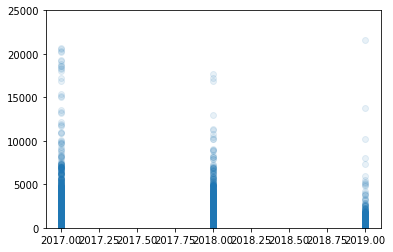

In [74]:
y = df.select('year').rdd.flatMap(lambda x : x).collect()
plt.scatter(y,t,alpha = 0.1)
plt.ylim(0,25000)

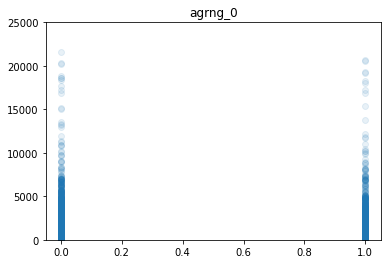

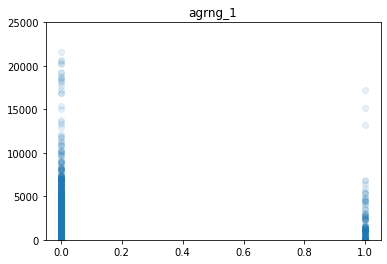

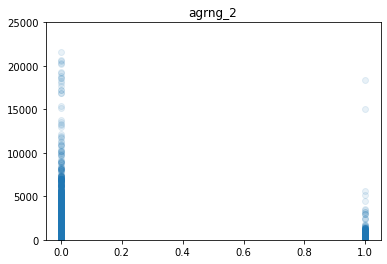

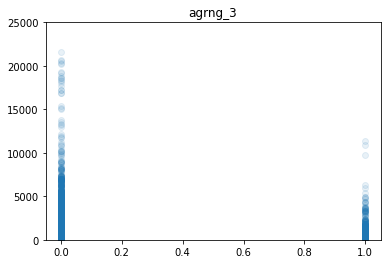

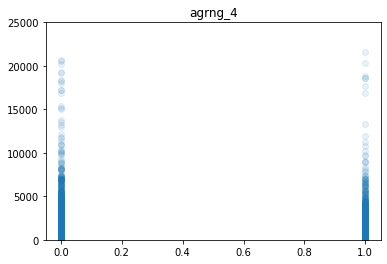

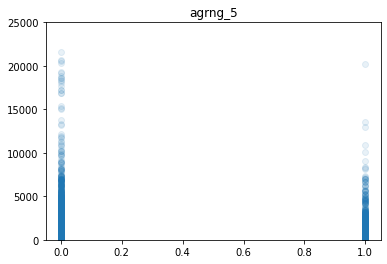

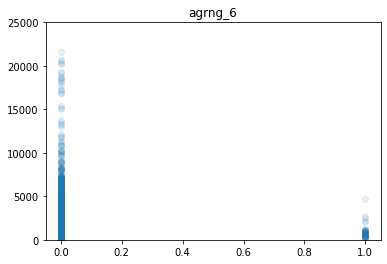

In [73]:
for i in ['agrng_0','agrng_1','agrng_2','agrng_3','agrng_4','agrng_5','agrng_6']:
    a = df.select(i).rdd.flatMap(lambda x : x).collect()
    plt.scatter(a,t,alpha = 0.1)
    plt.ylim(0,25000)
    plt.title(i)
    plt.show()

In [75]:
df.columns

['year',
 'month',
 'day',
 'hour',
 'travel_time',
 'agrng_0',
 'agrng_1',
 'agrng_2',
 'agrng_3',
 'agrng_4',
 'agrng_5',
 'agrng_6']

In [76]:
columnJoin = VectorAssembler(inputCols = ['year','month','day','hour','agrng_0','agrng_1','agrng_2','agrng_3','agrng_4','agrng_5','agrng_6'],outputCol = 'features')
t_df = columnJoin.transform(df)
t_df = t_df.select(['features','travel_time'])
t_df.show(5)

+--------------------+-----------+
|            features|travel_time|
+--------------------+-----------+
|(11,[0,1,2,4],[20...|        219|
|(11,[0,1,2,8],[20...|        359|
|(11,[0,1,2,8],[20...|        375|
|(11,[0,1,2,9],[20...|        264|
|(11,[0,1,2,8],[20...|        367|
+--------------------+-----------+
only showing top 5 rows



In [77]:
t_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- travel_time: long (nullable = true)



In [78]:
splits = t_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [79]:
lr = LinearRegression(featuresCol = 'features', labelCol='travel_time')
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-154.23206752463292,-22.16393565437596,-6.580214967931145,4.634253212535606,103.49741450634177,425.7663990048011,-120.33669466732773,-30.3489522308728,-112.61527862739544,7.081295284194966,-2.237927632443745]
Intercept: 312415.1149267141


In [80]:
summ = lr_model.summary

In [81]:
print(summ.rootMeanSquaredError)
print(summ.r2)

3166.5923822308764
0.001905786037846302
